# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [65]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

La raíz aproximada de la función cos(x)-x**2 es 0.8241323123025224 y tomó 4 iteraciones
con bisectris el valor fue 0.8241323123020265
con newton el valor fue 0.8241323123025175
con Steffensen el valor fue 0.8241323123025224


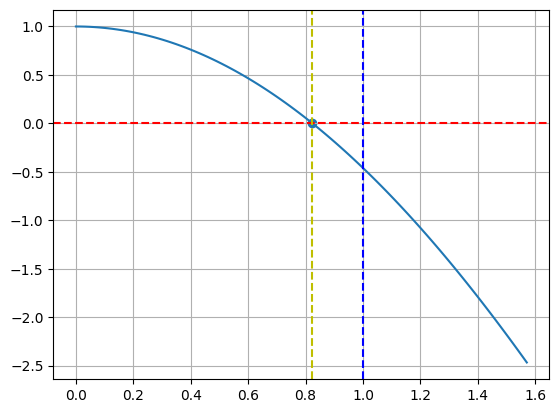

In [92]:
from re import X
# Aquí va su código
def f(x): #defino la funcion f(x) a la cual quiero encontrar los valores de x que me retornen 0
  return np.cos(x)-x**2
valores_x= np.linspace(0,0.5*np.pi,100)
valores_y= f(valores_x)
plt.plot(valores_x,valores_y)
plt.axhline(0,color="r",linestyle="--")
plt.axvline(1,color="b",linestyle="--")
plt.grid()
#primero ploteo una grafica de los valores de x y y con mi funcion f(x) para poder tener una idea de como debe ir el metodo y donde va el 0 de mi función
def Steffensen(x,tol,maxiter):# la función recibe un valor de x (idealmente cercana a la raíz), una tolerancia y un maximo de iteración por si no converge para no agotar a la maquina
  iterador=0
  for i in range(maxiter):
      iterador+=1
      y=x + f(x)
      denominador= f(y)-f(x) #
      if denominador==0:
        break
        print("división por 0")
        return None
      x1= x- f(x)**2/denominador
      if abs(x1-x)<tol:
        break
      else:
        x=x1
  return f"La raíz aproximada de la función cos(x)-x**2 es {x1} y tomó {iterador} iteraciones"


print(Steffensen(0.7,1e-8,100))

def Steffensen_valor(x,tol,maxiter):# es exactamente lo mismo que su hermana pero esta me da un valor
  iterador=0
  for i in range(maxiter):
      iterador+=1
      y=x + f(x)
      denominador= f(y)-f(x)
      if denominador==0:
        break
        print("división por 0")
        return None
      x1= x- f(x)**2/denominador
      if abs(x1-x)<tol:
        break
      else:
        x=x1
  return x1
X_Steffensen=Steffensen_valor(0.7,1e-8,100) # nombro una variable como la funcion de Steffencen para plotear el scatter
plt.axvline(X_Steffensen,linestyle="--",color="y")
plt.scatter(X_Steffensen,0)
new = newton(f,0.7)
bis= bisect(f,0.5,1)
print(f"con bisectris el valor fue {bis}")
print(f"con newton el valor fue {new}")
print(f"con Steffensen el valor fue {X_Steffensen}")


In [94]:
x=np.linspace(0,np.pi*0.5,100)
y= f(x)
diccionario={"X":x,"fx":y}
df=pd.DataFrame(diccionario)
df[(df['fx'] <0.1) & (df['fx']>-0.1)]

,X,fx
50,0.793331,0.072100
51,0.809198,0.035277
52,0.825065,-0.002222
53,0.840931,-0.040397
54,0.856798,-0.079242


#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





In [ ]:
# Aqui va su código
def doble_factorial(n):
  """calcula unicamente el doble factorial n!!"""
  if n <=0:
    return 1
  else:
    resultado=1
    for i in range(1,n+1,2):
      resultado*=i
      return resultado